# Income Level Prediction 

**Project Overview**

The aim of this project is to develop a machine learning model to predict whether a person’s income exceeds $50K per year based on census data. By leveraging various features from the census dataset, I will explore the data, engineer relevant features, build and evaluate a predictive model, and provide insights from the data. This project will help in understanding the factors that influence income levels and can assist in policy-making, socio-economic studies, and other related fields. 

**Dataset Overview**

The dataset used for this project consists of 48,842 entries, each representing an individual's census data. It contains the following 15 features:

1.	Age: The age of the individual.
2.	Workclass: The employment status of the individual (e.g., Private, Self-emp-not-inc, State-gov).
3.	Fnlwgt: The final weight, which represents the number of people the census believes the entry represents.
4.	Education: The highest level of education attained by the individual.
5.	Education-num: The number of years of education completed.
6.	Marital-status: The marital status of the individual (e.g., Never-married, Married-civ spouse).
7.	Occupation: The occupation of the individual (e.g., Adm-clerical, Exec-managerial).
8.	Relationship: The individual's relationship status within a family (e.g., Not-in-family, Husband).
9.	Race: The race of the individual (e.g., White, Black).
10.	Sex: The gender of the individual. 
11.	Capital-gain: Capital gains recorded for the individual.
12.	Capital-loss: Capital losses recorded for the individual. 
13.	Hours-per-week: The number of hours worked per week. 
14.	Native-country: The native country of the individual.
15.	Income: The target variable indicating whether the individual's income is greater than or less than or equal to $50K per year  (<=50K, >50K)


These features provide a comprehensive overview of the socio-economic status and work related characteristics of the individuals, which can be used to predict their income levels. By training a machine learning model on this dataset, I aim to accurately classify whether an individual's income exceeds $50K per year, thereby gaining insights into the determinants of income levels.

**Project outline**

1.	Data Collection and Preparation
a.	Data Importation
b.	Initial Data Inspection
2.	Exploratory Data Analysis (EDA)
3.	Data Preprocessing and Feature Engineering
a.	Handling Missing Values
b.	Encoding Categorical Variables
c.	Feature Scaling
4.	Model Development
a.	Train-Test Split
b.	Model Selection and Training
c.	Model Evaluation

### 1. Data Collection and Preparation

**Import Packages**

In [7]:
# For data Manipulation
import numpy as np
import pandas as pd

# For data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
 
# For Machine Learning
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    roc_auc_score,
    confusion_matrix,
    roc_curve
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier

**Data Importation and Inspection**

In [9]:
# Importing Dataset 
xlsx = pd.ExcelFile('income_data.xlsx')
df = xlsx.parse()

In [10]:
# Create a copy of the DataFrame to preserve the original
df = df.copy()

In [11]:
# Displaying the first 5 rows
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [12]:
# Displaying the last 5 rows
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
48841,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


In [13]:
# Displaying number of rows and column present
df.shape

(48842, 15)

There are **48842** rows and **15** columns present in the dataset

**Summary of Dataset**

In [16]:
# Displaying information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [17]:
# Displaying the last 5 columns of Income
df["income"].tail()

48837    <=50K
48838    <=50K
48839    <=50K
48840    <=50K
48841     >50K
Name: income, dtype: object

In [18]:
# Convert object columns that represent categories to 'category' type
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation',
                        'relationship', 'race', 'sex', 'native-country', 'income']

for col in categorical_columns:
    df[col] = df[col].astype('category')

**Handling Missing Values**

In [20]:
#Check for missing values
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [21]:
#handling missing values with most frequent
imputer = SimpleImputer(strategy='most_frequent')
df[['workclass', 'occupation', 'native-country']] = imputer.fit_transform(df[['workclass', 'occupation', 'native-country']])

In [22]:
#Check normalized class distribution
df['income'].value_counts(normalize=True) 

income
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64

In [23]:
# Summary of Numerical variables
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


**Drop Irrelevant Features**

In [25]:
# Summary Statistics of categorical variables
df.describe(include='category')

,education,marital-status,relationship,race,sex,income
count,48842,48842,48842,48842,48842,48842
unique,16,7,6,5,2,2
top,HS-grad,Married-civ-spouse,Husband,White,Male,<=50K
freq,15784,22379,19716,41762,32650,37155


In [26]:
# Drop fnlwgt and education then keep education-num because they convey the same information
df = df.drop(columns=['fnlwgt', 'education-num'])

**fnlwgt** which represent the final weight of a person is irrelevant as it does not have a direct relationship with the target variable **income.** **eduction-num** is a relevant feature, but it was dropped since we have **education**

In [28]:
# verifying that columns are dropped
df.columns

Index(['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [29]:
display(df["workclass"].unique())
display(df["education"].unique())
display(df["marital-status"].unique())
display(df["occupation"].unique())
display(df["relationship"].unique())
display(df["race"].unique())
display(df["sex"].unique())
display(df["income"].unique())

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

['Bachelors', 'HS-grad', '11th', 'Masters', '9th', ..., '5th-6th', '10th', '1st-4th', 'Preschool', '12th']
Length: 16
Categories (16, object): ['10th', '11th', '12th', '1st-4th', ..., 'Masters', 'Preschool', 'Prof-school', 'Some-college']

['Never-married', 'Married-civ-spouse', 'Divorced', 'Married-spouse-absent', 'Separated', 'Married-AF-spouse', 'Widowed']
Categories (7, object): ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

['Not-in-family', 'Husband', 'Wife', 'Own-child', 'Unmarried', 'Other-relative']
Categories (6, object): ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife']

['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other']
Categories (5, object): ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

['<=50K', '>50K']
Categories (2, object): ['<=50K', '>50K']

In [30]:
#Get the value count of each unique value in the 'native-country' column
df['native-country'].value_counts()

native-country
United-States                 44106
Mexico                          951
?                               583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [31]:
# Converting '?' to 'Unknown'
df['native-country'] = df['native-country'].replace('?', 'Unknown')
df['workclass'] = df['workclass'].replace('?', 'Unknown')
df['occupation'] = df['occupation'].replace('?', 'Unknown')

In [32]:
# Verify the native-country column
df['native-country'].value_counts()

native-country
United-States                 44106
Mexico                          951
Unknown                         583
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

### 2. Exploratory Data Analysis (EDA) and Visualizations
Objectives for EDA
- Distribution of income
- Age Distribution
- Work Distribution
- Education Distribution
- Gender Distribution
- Age vs Income
- Work vs Income
- Occupation vs Income
- hours worked vs Income

**Distribution of Income**

In [35]:
# Insight 1: Income Distribution 
# Counting occurence of Income
df['income'].value_counts()

income
<=50K    37155
>50K     11687
Name: count, dtype: int64

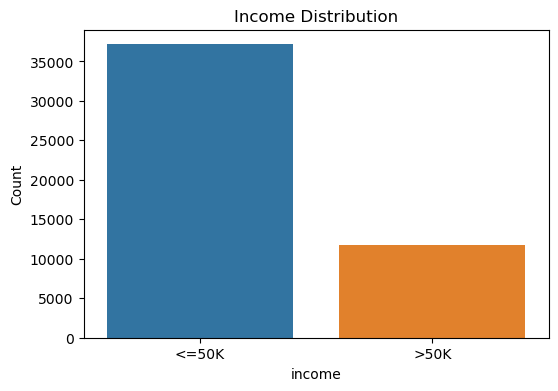

In [36]:
#Plot 1. Distribution of Income
plt.figure(figsize=(6,4))
sns.countplot(x='income', hue='income', data=df)
plt.title('Income Distribution')
plt.ylabel('Count')
plt.show()

The dataset categorizes income into two distinct levels: individuals earning less than or equal to 50K (<=50K) and those earning more than 50K (>50K). Majority of individuals earn <=50K per year, while a smaller ratio of the individual earn $50K per year. A larger percentage of people in this dataset have lower annual earnings. The imbalance in the data  have an implication on the model training, as the disproportionate class sizes affected the model's performance in predicting the >50K class accurately. This might lead to the need for strategies such as class weighting or resampling to address this imbalance.

**Distribution of Age**

In [39]:
# Insight 2: Age Distribution
# counting occurence of age
df['age'].value_counts()

age
36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: count, Length: 74, dtype: int64

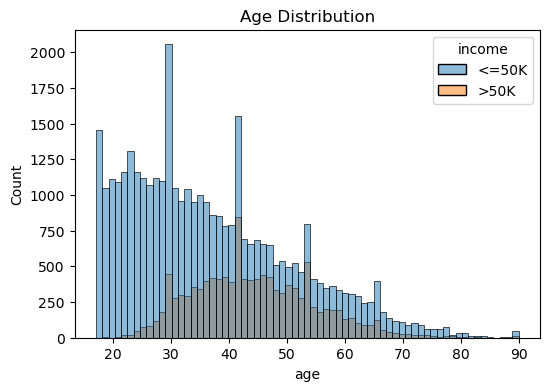

In [40]:
#Plot 2. Age Distribution
plt.figure(figsize=(6,4))
sns.histplot(x='age', hue='income', data=df)
plt.title('Age Distribution')
plt.ylabel('Count')
plt.show()

This shows the distribution of age groups. A noticeable peak occurs in the 30s age range , where counts are highest. Ages between 20s and 60s appear to have higher counts of individuals who earn more income why there are significantly fewer individuals in the 70s, 80s and 90s. The distribution suggests a higher concerntration of individuals in thier 20s to 40s.

**Gender Distribution**

In [43]:
# Insight 3: Gender Distribution
# counting occurence of age
df['sex'].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

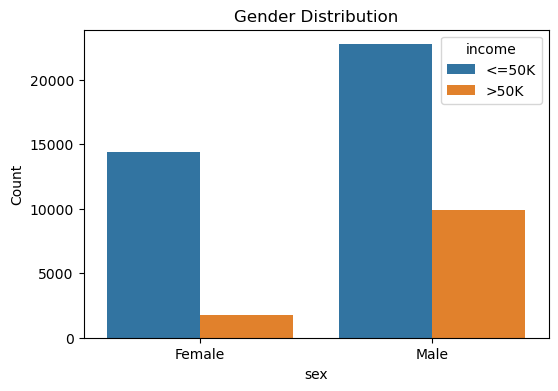

In [44]:
#Plot 3. Gender Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='income', data=df) 
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.show()

The dataset presents the **Gender** breakdown of respondents, with a total of **48,842** individuals. The results indicate that there are significantly more **male** respondents **(32,650)** compared to **female** respondents **(16,192).** This suggesta **Gender** imbalance in the sample, which may influence the overall analaysis or conclusions drawn from data.

**Work Distribution**

In [47]:
# Insight 4: Work Distribution
# counting occurence of age
df['workclass'].value_counts()

workclass
Private             34869
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Unknown              1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

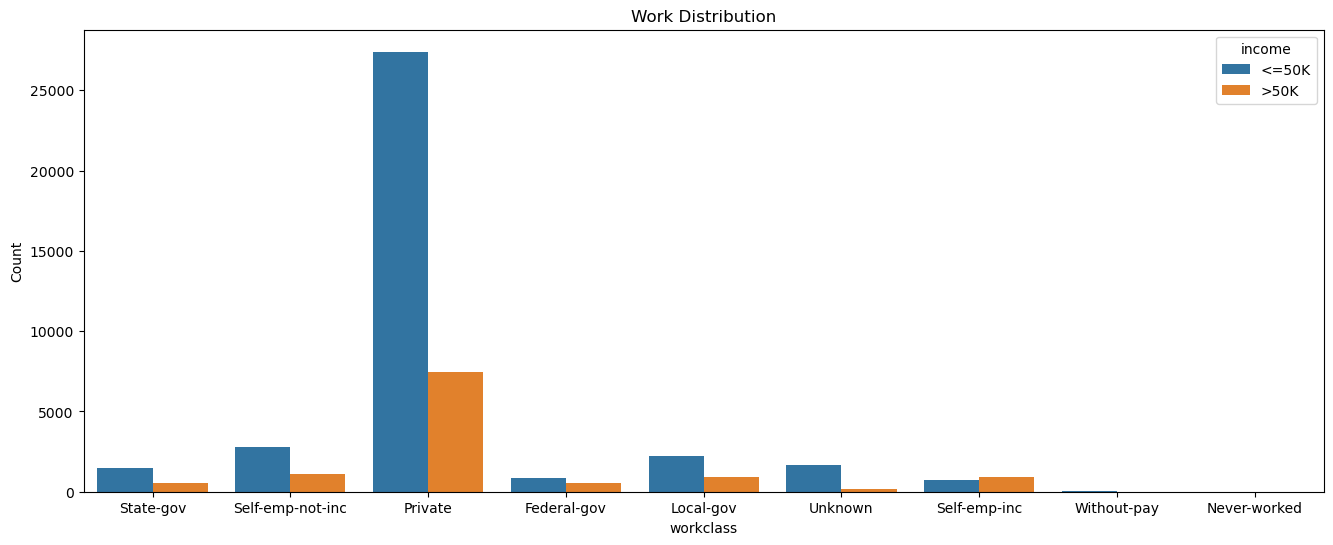

In [48]:
#Plot 4. Work Distribution
plt.figure(figsize=(16,6))
sns.countplot(x='workclass', hue='income', data=df)
plt.title('Work Distribution')
plt.ylabel('Count')
plt.show()

The datasets shows that the **Private** workclass has the the highest count, significantly outweighing other categories. 

**Education Distribution**

In [51]:
# Insight 5: Education Distribution
# counting occurence of age
df['education'].value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

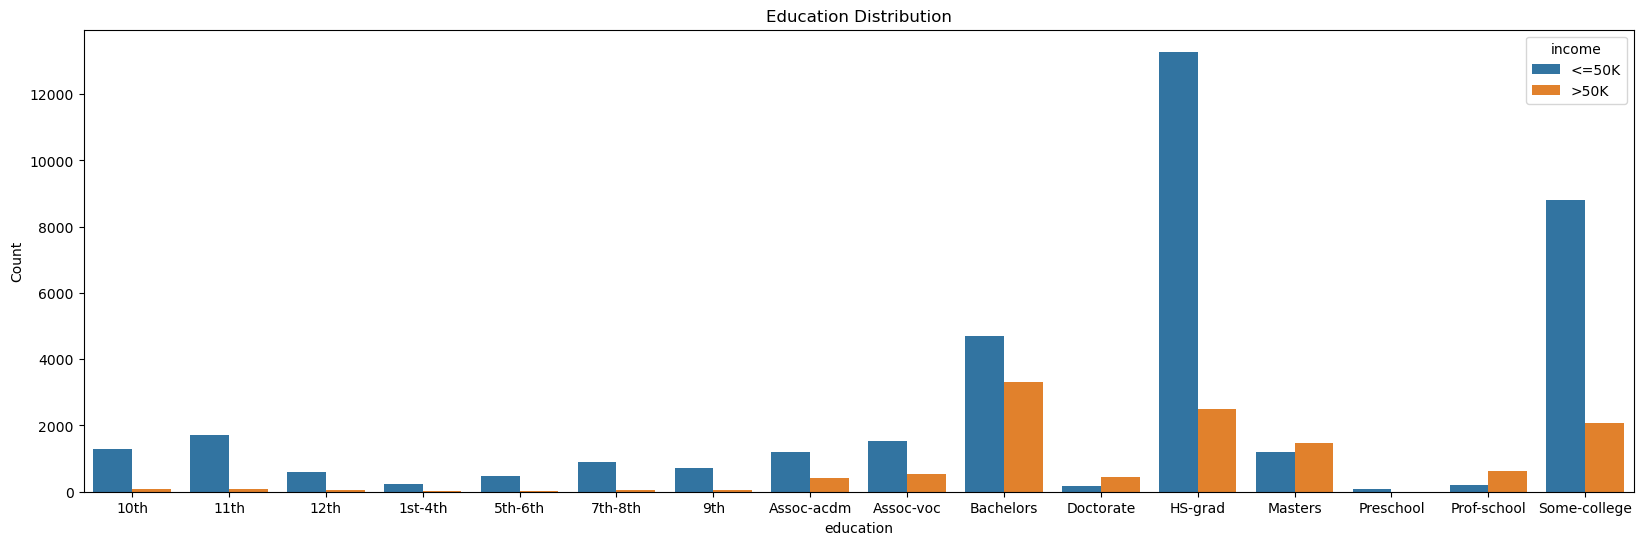

In [52]:
#Plot 5. Education Distribution
plt.figure(figsize=(20,6))
sns.countplot(x='education', hue='income', data=df)
plt.title('Education Distribution')
plt.ylabel('Count')
plt.show()

The Education distribution shown in the bar chart highlights that the **HS-grad**, **some-college** and **Bachelors** category has the highest count, illustrating a potentially significant trend among the population being analyze.

**Relationship between Work Class and Income Level**

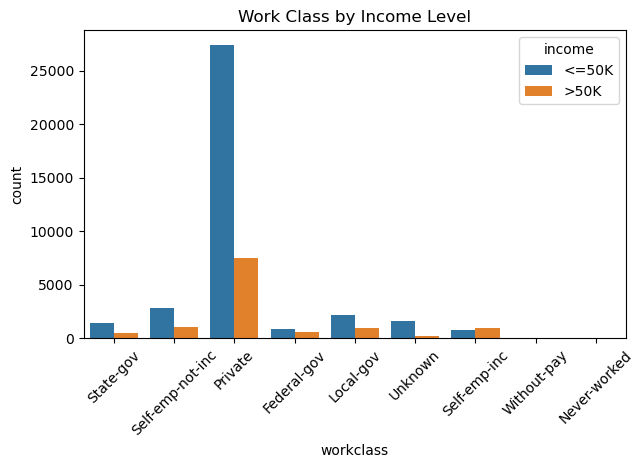

In [55]:
# Plot 7:Plotting the relationship between Work Class and Income Level
plt.figure(figsize=(7, 4))
sns.countplot(x='workclass', hue='income', data=df)
plt.title('Work Class by Income Level')
plt.xticks(rotation=45)
plt.show()

This is use to examine the different workclass and how they are paid. This will help determine which occupation collect the highest salary and which occupation collect a low salary.

**Relationship between Age and Income Level**

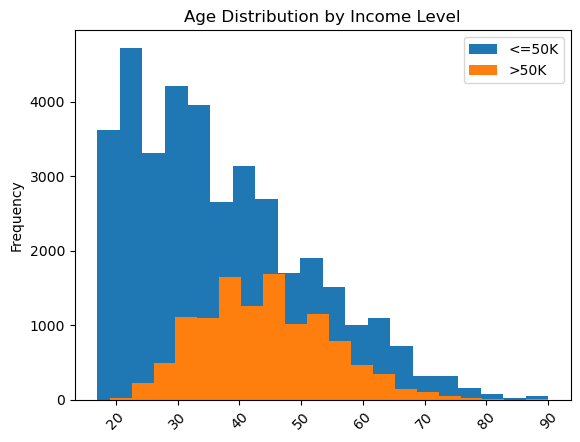

In [58]:
#Plot 6. Plotting the relationship between Age and Income Level
# Plot for individuals earning <=50K
df[df['income'] == '<=50K']['age'].plot(kind='hist', bins=20,  label='<=50K')

# Plot for individuals earning >50K
df[df['income'] == '>50K']['age'].plot(kind='hist', bins=20, label='>50K')
plt.xticks(rotation=45)
plt.title(f'Age Distribution by Income Level')
plt.legend()
plt.show()

**Relationship between education level and income level**

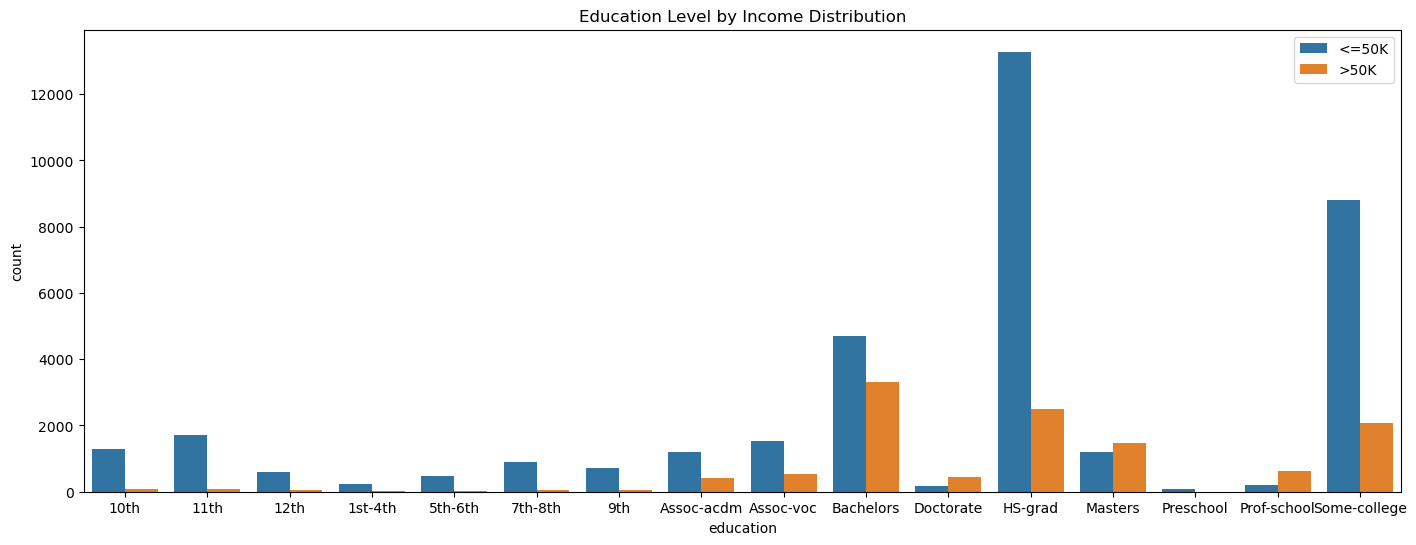

In [60]:
 # Plot 8: Plotting the relationship between education level and income level
plt.figure(figsize=(17, 6))
sns.countplot(x='education', hue='income', data=df)
plt.title('Education Level by Income Distribution')
plt.legend()
plt.show()

This analysis explores the relationship between education level and income, aiming to determine whether higher education correlates with higher income. By examining how individuals with varying education levels fall into the income categories (<=50K and >50K). 

**Relationship Occupation and income Level**

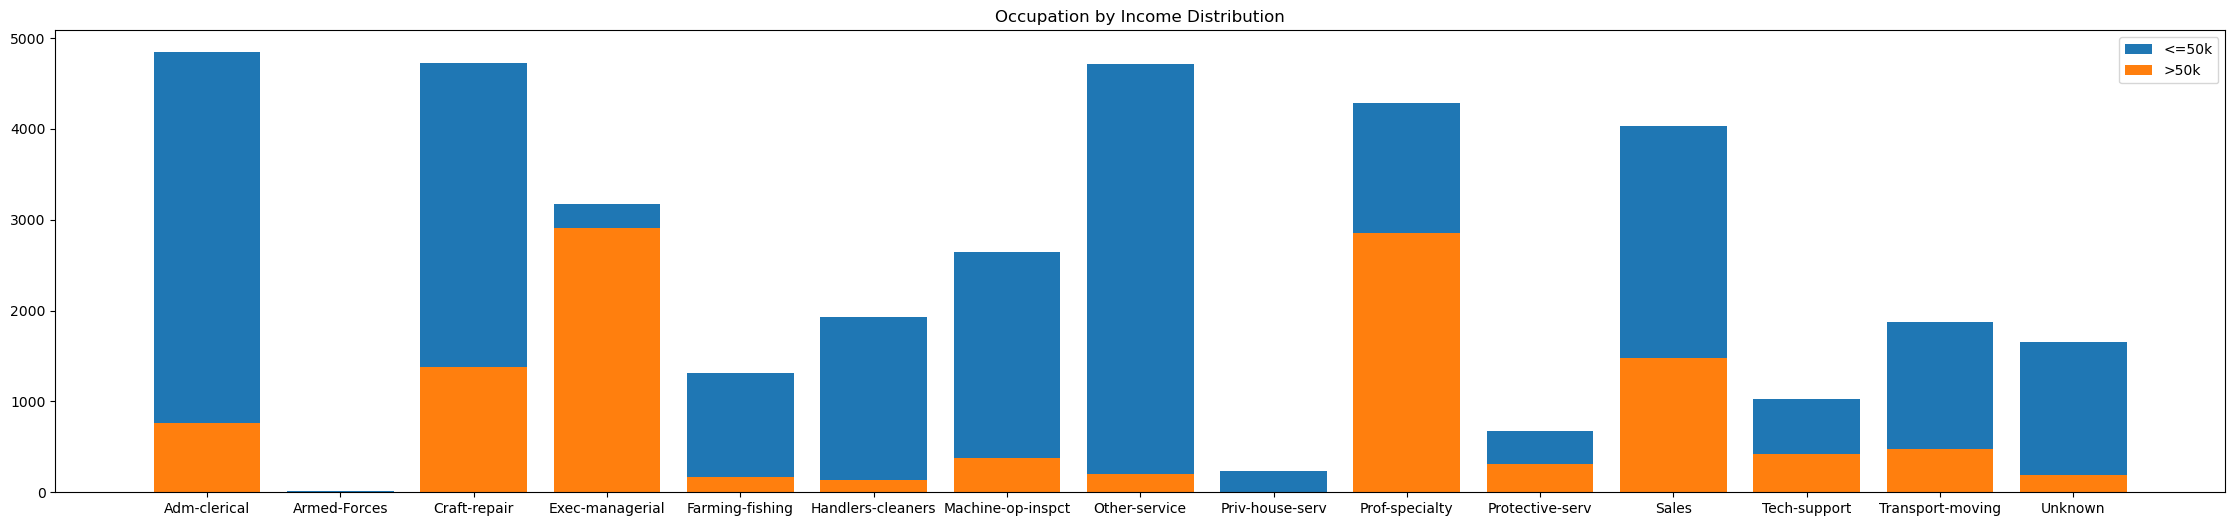

In [63]:
# Checking for the relationship between occupation and income level
occupation_income = df.groupby('occupation')['income'].value_counts().unstack()

# Plot 9: Plotting the relationship workclass and income Level
plt.figure(figsize=(28, 6))
plt.bar(occupation_income.index, occupation_income.values[:, 0], label='<=50k')
plt.bar(occupation_income.index, occupation_income.values[:, 1], label='>50k')

plt.title('Occupation by Income Distribution')
plt.legend()
plt.show()

This is use to examine the different occupations and how they are paid. This will help determine which occupation collect the highest salary and which occupation collect a low salary.


**Relationship Gender and Income Level**

C:\Users\ajuel\AppData\Local\Temp\ipykernel_22780\157892633.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sex_income = df.groupby('sex')['income'].value_counts().unstack()


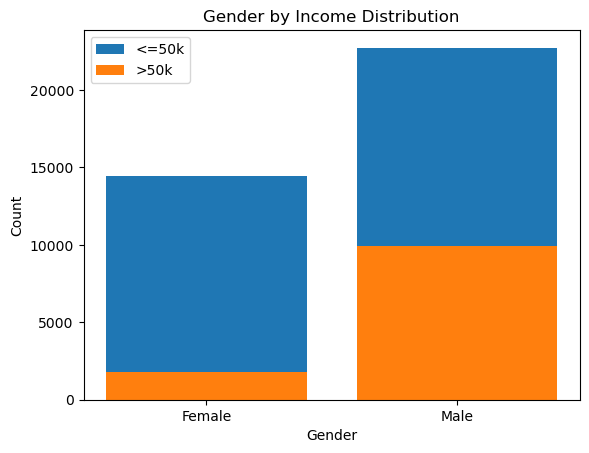

In [66]:
 # Plot 10: Plotting the relationship Gender and Income Level
# Checking for Relationship
sex_income = df.groupby('sex')['income'].value_counts().unstack()
# Plotting the graph
plt.bar(sex_income.index, sex_income.values[:, 0], label='<=50k')
plt.bar(sex_income.index, sex_income.values[:, 1], label='>50k')
plt.title('Gender by Income Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend()
plt.show()

This shows the relationship between **Gender** and income showing whether gender affects **Income distribution.**

### 3. Data Preprocessing and Feature Engineering

**Handling Missing Values**
Missing values have been addressed during initial data inspection.

In [70]:
#identifying categorical and numerical variables 
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
numeric_columns = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

In [71]:
# Encode categorical variables using labelEncoder
label_encoder = LabelEncoder()
df_encoded = df.copy()

In [72]:
# Encoding categorical features
for column in ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column])

### 4. Model Development

**Train-Test Split**

In [75]:
# Define features (x) and target (y) 
X = df_encoded.drop(columns=['income'])
y = df_encoded['income']
print("X shape:",X.shape)
print("y shape:", y.shape)

X shape: (48842, 12)
y shape: (48842,)


In [76]:
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (39073, 12)
y_train shape: (39073,)
X_test shape: (9769, 12)
y_test shape: (9769,)


**Model Selection And Training**

**Using Pipeline Model**

In [79]:
# Creating Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
    ])

In [80]:
# Define the model
model = RandomForestClassifier(random_state=0)

In [81]:
# Creating model
model = make_pipeline(
    preprocessor,
    RandomForestClassifier(random_state=42)
)

In [ ]:
# Training the model
model.fit(X_train, y_train)

In [ ]:
y_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(y_train, y_train_pred)

In [ ]:
# Predict and evaluate
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {test_accuracy:.6f}")
print(classification_report(y_test, y_test_pred))

In [ ]:
# Print feature names
feature_names = preprocessor.named_transformers_['num'].get_feature_names_out().tolist() + \
                preprocessor.named_transformers_['cat'].get_feature_names_out().tolist()
feature_names

In [ ]:
# Get the number of features after one-hot encoding
preprocessor.fit(X)
num_features = len(preprocessor.named_transformers_['num'].get_feature_names_out()) + \
               len(preprocessor.named_transformers_['cat'].get_feature_names_out())
num_features

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

In [ ]:
# Plot confusion matrix
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
# Visualising the feature importance by creating a bar plot
importances = X_train.columns

# Sorting the feature importance in descending order
indices = np.argsort(importances) [::-1]

# Create a bar plot
plt.figure(figsize=(6, 4))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.tight_layout()
plt.show()

**Using RandomForestClassifier**

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 150],           
    'max_depth': [10, 20, None],               
    'min_samples_split': [2, 5],               
    'min_samples_leaf': [1, 2],                
    'bootstrap': [True, False]                 
}

In [ ]:
# Initialize the RandomForestClassifier
rf_random_search = RandomForestClassifier(n_estimators=100, random_state=42) 
print("RandomForestClassifier initialized successfully.")
print("Parameters:", rf_random_search.get_params())

In [ ]:
#training model with best params and best score
best_rf = RandomForestClassifier(
    n_estimators=100, 
    min_samples_split=5, 
    min_samples_leaf=1, 
    max_depth=10, 
    bootstrap=True
)
best_rf.fit(X_train, y_train)

In [ ]:
# Prediction on the test set using the best model
y_pred_best = best_rf.predict(X_test)

In [ ]:
# Calculating best accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)

In [ ]:
# Predicting probabilities for the positive class
y_pred_prob = best_rf.predict_proba(X_test)[:, 1]

In [ ]:
# Computing AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

In [ ]:
# getting Classification report
class_report_best = classification_report(y_test, y_pred_best)

# Print accuracy and classification report
print(f"Accuracy: {accuracy_best:.6f}")
print(f"Classification Report:\n{class_report_best}")
print(f"ROC-AUC: {roc_auc}")

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['<=50K', '>50K'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix by Random Forest Classifier')
plt.show()

In [ ]:
# Get feature importance from the trained RandomForest classifier
rf_feature_importances = best_rf.feature_importances_

# Create a DataFrame and sort by importance
rf_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importances
}).sort_values(by='Importance', ascending=False)

# Select the top features
rf_features = rf_feature_importance_df.head()

# Plot the top feature importance for Random Forest
plt.figure(figsize=(6, 4))
plt.barh(rf_features['Feature'], rf_features['Importance'])
plt.title('Top Random Forest Feature Importance')
plt.gca().invert_yaxis()  # To show the most important features at the top
plt.xlabel('Feature Importance')
plt.show()

In [ ]:
# Computing ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label='>50K')

In [ ]:
# Computing AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

**Summary And Recommendations**

**Key Insights from EDA**
1. I observed that there is a significant imbalance between the classes with many more individuals earning <=50K than >50K.
2. I also noticed that there are significantly more male respondents (32,650) compared to female respondents (16,192). This suggesta Gender imbalance in the sample, which may influence the overall analaysis or conclusions drawn from data.
3. In **Income Distribution** i notice that majority of individuals earn <=50K per year, while a smaller ratio of the individual earn $50K per year. A larger percentage of people in this dataset have lower annual earnings. The imbalance in the data  have an implication on the model training, as the disproportionate class sizes affected the model's performance in predicting the >50K class accurately. This might lead to the need for strategies such as class weighting or resampling to address this imbalance.
4. In **Age Vs Income Level** I also observed a correlation between age and income. Younger individuals tend to earn less as they are in the early stages of their careers, whereas older individuals typically earn more due to their experience and career progression. This aligns with the general understanding of how income grows over a lifetime.

5. In **Education vs Income level** Individuals with advanced degrees (e.g., Doctorate, Masters, Bachelors) earn higher while, individuals with lower education levels, such as those with High School or less earn lesser. The level of degree of individual determine there income.
6. **Occupation vs Income Level** In many occupations, the majority of workers earn <=50K, a large number of people in the workforce earn below $50K. Occupation plays a significant role in determining income levels. Managerial and professional roles tend to offer better financial outcomes, while service-related or manual labor jobs are concentrated in the lower income bracket. This emphasizes that occupation is a critical feature when predicting income levels in a machine learning model.
7. In **Gender and Income Level** Men earn higher compared to female. This could be attributed to a variety of factors, including occupational roles, work experience, or societal factors. Gender is an important factor to consider when analyzing or predicting income levels in a machine learning model.

**Model Performance**

This study assessed the performance of two machine learning models, Pipeline Model and the Random Forest Classifier, in predicting income levels based on census data. The aim is to develop a machine learning model that can accurately predict income level.

**Evaluation Metrics**

a. Pipeline Model

**Accuracy:** 0.84
**Precision:** 0.88 (for <=50K), 0.71 (for >50K)
**Recall:** 0.92 (for <=50K), 0.61 (for >50K)
**F1 Score:** 0.90 (for <=50K), 0.66 (for >50K)

The pipeline model provides an accuracy of 0.84%, which is decent, the recall of 0.61. This indicates that while the model has a relatively high precision (0.71%), meaning it correctly predicts positive cases most of the time, it misses a significant number of true positives (people earning >50K). The low recall suggests the model is conservative in predicting higher incomes, making fewer false positives but missing many actual high-income earners.

The F1 score of 0.66% reflects the imbalance between precision and recall. Since F1 is the harmonic mean of precision and recall, a lower F1 indicates a poor balance between these two.

b. Random Forest Classifier

**Accuracy:** 0.86
**Precision:** 0.87 (for <=50K), 0.82 (for >50K)
**Recall:** 0.96 (for <=50K), 0.55 (for >50K) 
**F1 Score:** 0.91 (for <=50K), 0.66 (for >50K)
**ROC-AUC:** 0.91

The Random Forest Classifier improves accuracy slightly to 0.86%. However, similar to the pipeline model, the recall for the >50K class is still quite low (0.55%). This means that the model is much better at correctly identifying people who earn <=50K but struggles to identify higher earners. This is a common issue in imbalanced datasets where the model gets biased towards the majority class.

The precision for the >50K class is excellent (0.82%), indicating that when the model predicts someone earns more than 50K.      But because of the poor recall, the model fails to identify many individuals who do earn more than $50K.
The F1 score for the >50K class is only 0.66%, reflecting the poor balance between precision and recall.

**Effectiveness of Predicting Income Level with Random Forest Classifier**

**Strengths:**

The Random Forest model performs reasonably well on the overall dataset, especially for the lower-income class (<=50K). It achieves high accuracy and is highly precise for identifying people earning below $50K.
The ROC-AUC of ~0.91 indicates good ability to differentiate between the income classes, suggesting the model is relatively effective.

**Weaknesses:**

The Random Forest, have difficulty with the higher income class (>50K). The recall for this class is low in both models, meaning many high-income earners are missed.
This issue can largely be attributed to class imbalance, where there are more individuals earning <=50K than those earning >50K, causing the model to favor the majority class.


**How the Model Can Be Improved:**

**Improving Pipeline Model**
1. **Class Weights:** Many machine learning models can take class_weight parameters. This can encourage the model to focus more on the minority class and improve recall.
2. **Threshold Tuning:** By default, the model predicts the class with the highest probability (i.e., a threshold of 0.5). You can adjust this threshold to improve recall at the expense of precision. Adjusting the decision threshold to find a better trade-off between precision and recall. This could help identify more people earning >50K.
3. **Feature Engineering:** Improving the features that go into the pipeline can significantly affect model performance. Creating **interactive features** (combinations of features that could capture new patterns). Existing data can be combined to reveal new insights. Data format can be changed to make it more useful. Uncover hidden patterns in your data. Help your model understand data better.
4. **Resampling Techniques:** You can oversample the minority class (people earning >50K) or reducing the majority class (<=50K). A popular technique is SMOTE (Synthetic Minority Over-sampling Technique) generates sythentic examples for the minority class.


**Improving the Random Forest Model**
1. **Class Weights:** Similar to pipeline model, applying class weight adjustment encourage the Random Forest to focus more on the minority class.
2. **Tune Decision Threshold** As the pipline model, adjusting the decision threshold for the Random Forest Model can improve recall. lowering the threshold can helo the model to predict more positives.
3. **Hyperparameter Tuning** Random Forests have several hyperparameters that can be tune to improve performance. Using GridSearch or **RandomizedSearchCV** to find optimal hyperparameters.
4. **Feature Importance and Selection** Random Forest allows rank feature importance, which can be use to eliminate irrelevent features that may affect model performance.


**Summary**

To improve both models
1. **Adjusting class weights** to increase recall
2. **Tune decision thresholds** to find a balance between precision and recall
3. **Appling resampling techniques** like SMOTE if data is imbalanced.
4. **Perform hyperparameter tuning** to optimize the model.
5. **Considering boosting and ensemble methods** for better handling of complex patterns.